In [1]:
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
from qiskit.tools.visualization import plot_histogram

In [263]:
#This code is for 3 qubits and 1 winner
n = 3
w = '101'

In [264]:
qcirc = QuantumCircuit(3,3)

In [265]:
qcirc.h(range(n))

In [266]:
def ccz():
    qcirc.h(2)
    qcirc.ccx(0,1,2)
    qcirc.h(2)

In [267]:
def oracle():
    for a in range(n):
        if w[a] is '0':
            qcirc.x(n-a-1)
    ccz()
    for a in range(n):
        if w[a] is '0':
            qcirc.x(n-a-1)

In [268]:
def mirror():
    qcirc.h(range(n))
    qcirc.x(range(n))
    ccz()
    qcirc.x(range(n))
    qcirc.h(range(n))

In [269]:
def rot():
    oracle()
    mirror()

In [270]:
for i in range(2):
    rot()

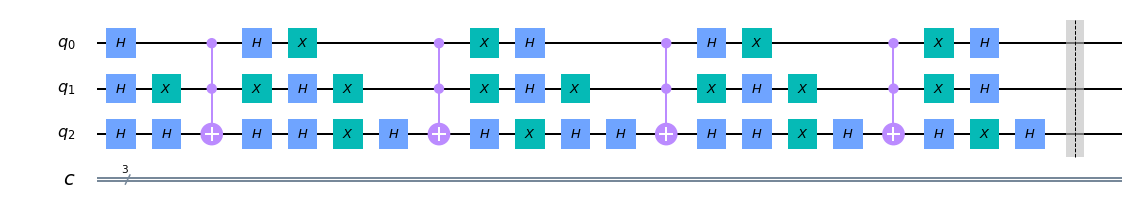

In [271]:
qcirc.barrier()
qcirc.draw(output='mpl')

In [272]:
qcirc.measure(range(n), range(n))

In [273]:
simulator = Aer.get_backend('qasm_simulator')

In [274]:
result = execute(qcirc, backend=simulator).result()

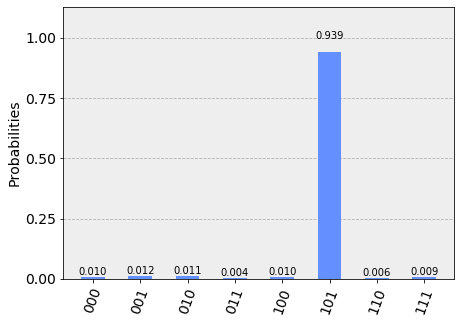

In [275]:
plot_histogram(result.get_counts(qcirc))